Demonstrate two different interpolation schemes using high frequency radar datasets

1. Spacial Bilinear interoplation of gaps
2. Temportal linear interolation of gaps throught time

In [39]:
%matplotlib notebook
import numpy as np
import xarray as xr
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [5]:
# Load HFR data
url='http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/2km/hourly/RTV/HFRADAR_US_West_Coast_2km_Resolution_Hourly_RTV_best.ncd'
ds = xr.open_dataset(url)

In [73]:
# Slice the dataset in space and time
start_time = dt.datetime(2017,5,27,5,0,0)
maxlat, minlat = 38.5, 37
minlon, maxlon = -123.5, -122

ds = ds.sel(time = slice(start_time, start_time + dt.timedelta(days=5)),
                      lat =  slice(minlat,maxlat),
                      lon = slice(minlon,maxlon))
ds_small = ds.isel(lat= slice(30,50), lon = slice(20, 40))

<IPython.core.display.Javascript object>


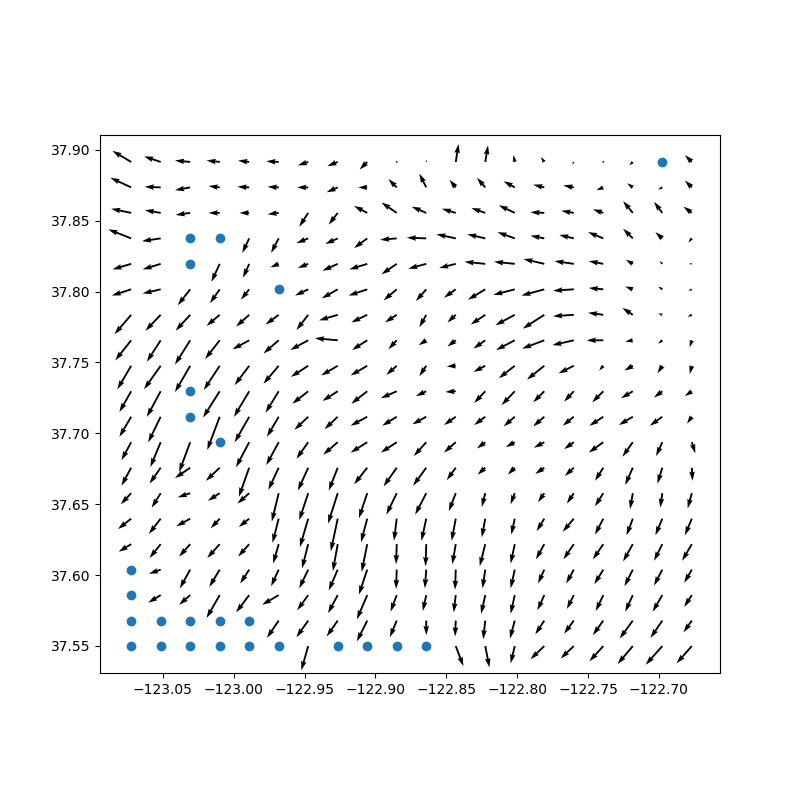

In [76]:
# Plot example data
subset = ds_small.isel(time=5)
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set_aspect('equal')
xx,yy = np.meshgrid(subset['lon'],subset['lat'])
ax.quiver(xx,yy,subset['u'],subset['v'],zorder=20)
ix_nan = np.where(np.isnan(subset['u'].values))
ax.scatter(xx[ix_nan], yy[ix_nan])

<IPython.core.display.Javascript object>


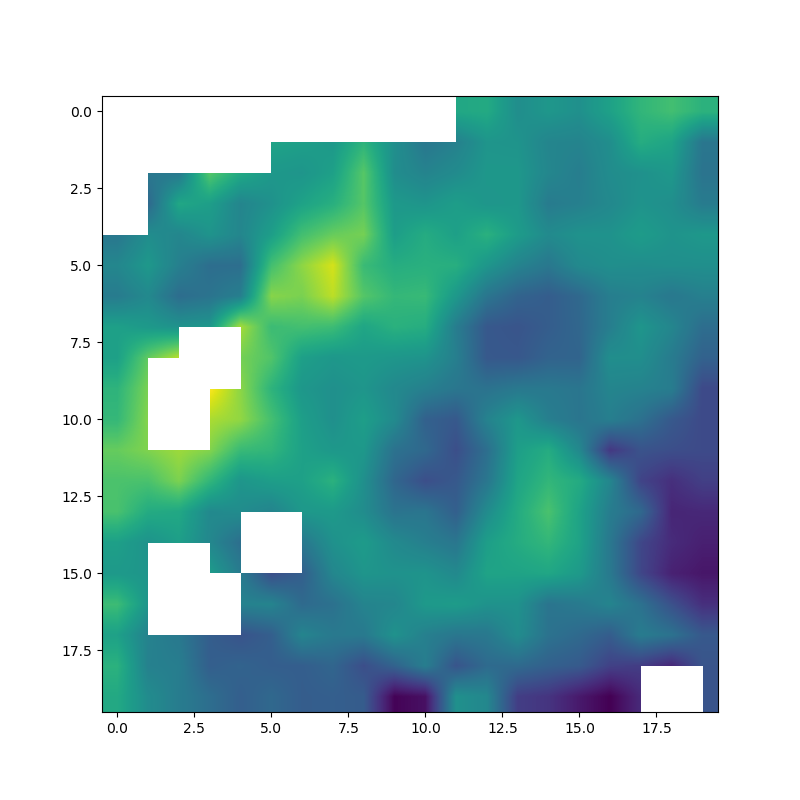

In [88]:
# Plot example data
subset = ds_small.isel(time=5)
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set_aspect('equal')
xx,yy = np.meshgrid(subset['lon'],subset['lat'])
subset['speed'] = np.sqrt(subset['u']**2 + subset['v']**2)
# ax.pcolormesh(xx, yy, subset['speed'])
ax.imshow(subset['speed'], interpolation='bilinear')
# ax.quiver(xx,yy,subset['u'],subset['v'],zorder=20)
# ix_nan = np.where(np.isnan(subset['u'].values))
# ax.scatter(xx[ix_nan], yy[ix_nan])

<IPython.core.display.Javascript object>


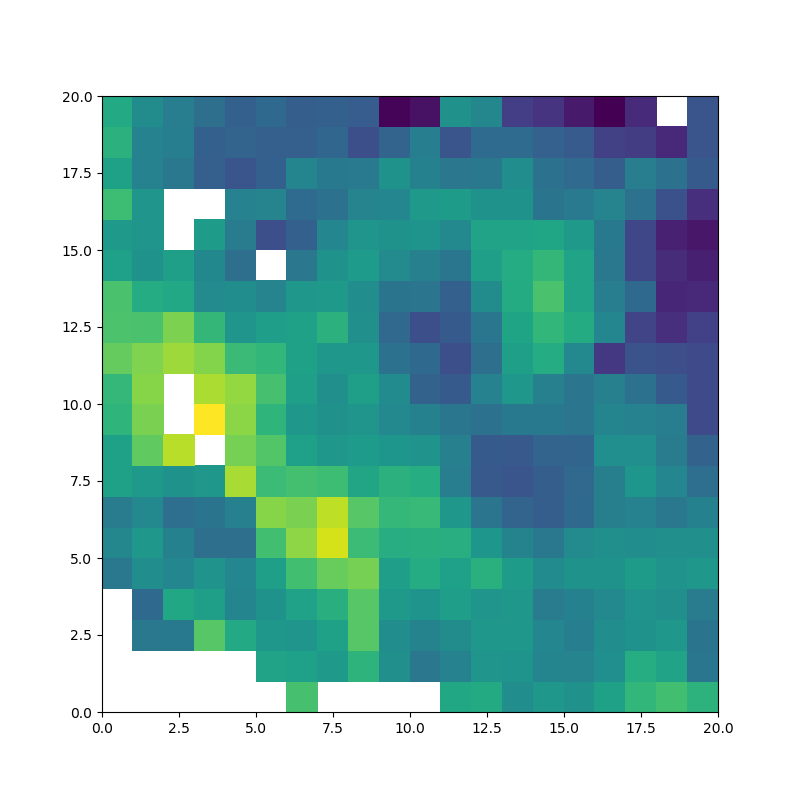

In [93]:
# Plot example data
subset = ds_small.isel(time=5)
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set_aspect('equal')
xx,yy = np.meshgrid(subset['lon'],subset['lat'])
subset['speed'] = np.sqrt(subset['u']**2 + subset['v']**2)
ax.pcolormesh(subset['speed'])
# ax.invert_yaxis()
# ax.imshow(subset['speed'], interpolation='bilinear')
# ax.quiver(xx,yy,subset['u'],subset['v'],zorder=20)
# ix_nan = np.where(np.isnan(subset['u'].values))
# ax.scatter(xx[ix_nan], yy[ix_nan])

<IPython.core.display.Javascript object>


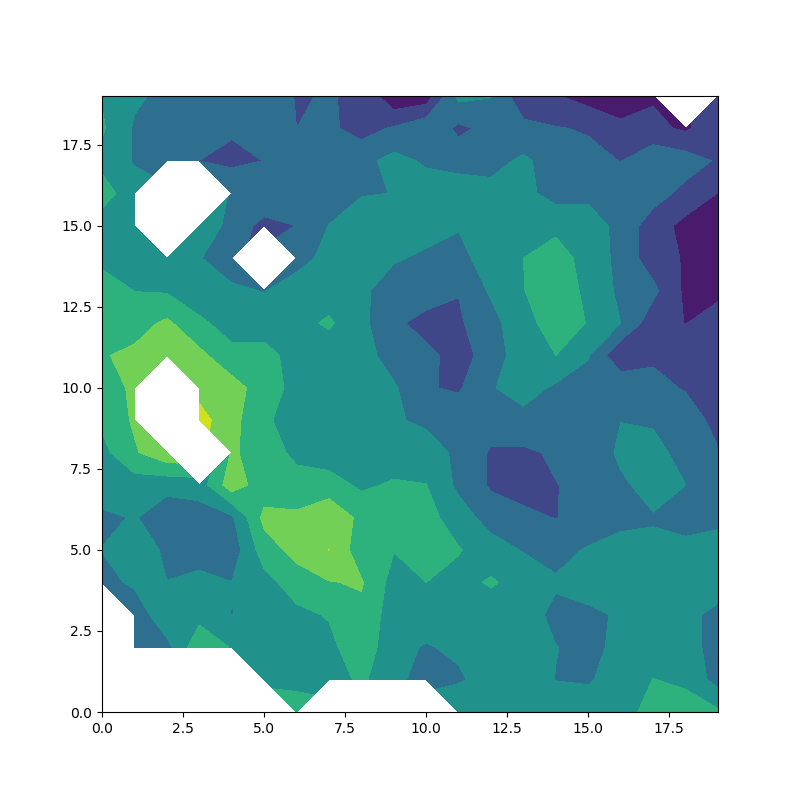

In [90]:
# Plot example data
subset = ds_small.isel(time=5)
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set_aspect('equal')
xx,yy = np.meshgrid(subset['lon'],subset['lat'])
subset['speed'] = np.sqrt(subset['u']**2 + subset['v']**2)
ax.contourf(subset['speed'])
# ax.invert_yaxis()
# ax.imshow(subset['speed'], interpolation='bilinear')
# ax.quiver(xx,yy,subset['u'],subset['v'],zorder=20)
# ix_nan = np.where(np.isnan(subset['u'].values))
# ax.scatter(xx[ix_nan], yy[ix_nan])

In [94]:
from geostatsmodels import utilities, variograms, model, kriging, geoplot

In [235]:
x = np.arange(0,20,1)*2
xx, yy = np.meshgrid(x,x) 

u = subset['u'].values.flatten()
v = subset['v'].values.flatten()

ix = np.where(np.isfinite(u))
ix_nan = np.where(np.isnan(u))

P = np.array((xx.flatten()[ix],yy.flatten()[ix],u[ix])).T
Q = np.array((xx.flatten()[ix],yy.flatten()[ix],v[ix])).T

<IPython.core.display.Javascript object>


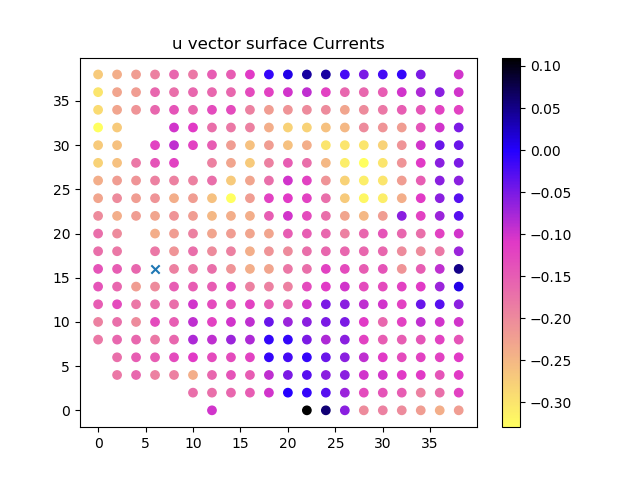

<IPython.core.display.Javascript object>


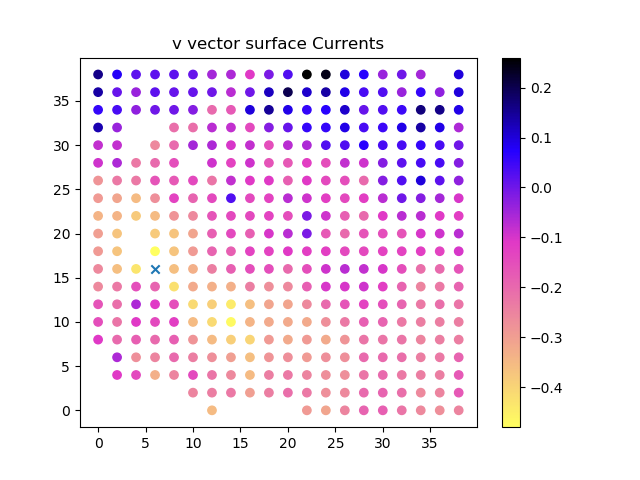

In [236]:
fig,ax = plt.subplots()

cax = ax.scatter( P[:,0], P[:,1], c=P[:,2], cmap=geoplot.YPcmap )
ax.scatter(x=6, y=16, marker='x')

plt.title('u vector surface Currents')
plt.colorbar(cax)

fig,ax = plt.subplots()

cax = ax.scatter( Q[:,0], Q[:,1], c=Q[:,2], cmap=geoplot.YPcmap )
ax.scatter(x=6, y=16, marker='x')

plt.title('v vector surface Currents')
plt.colorbar(cax)

/Users/pdaniel/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/pdaniel/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


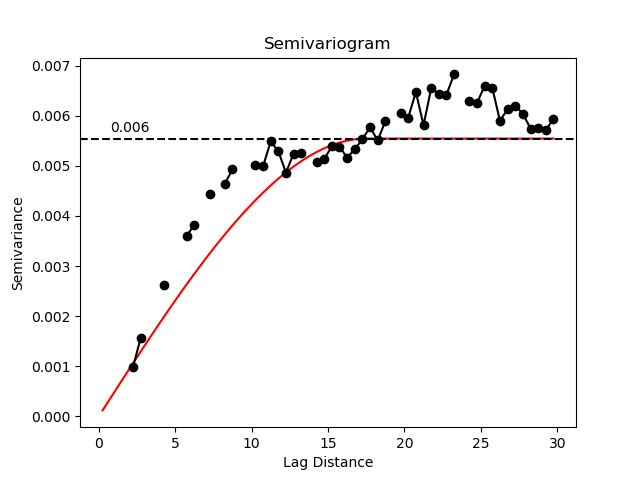

<IPython.core.display.Javascript object>


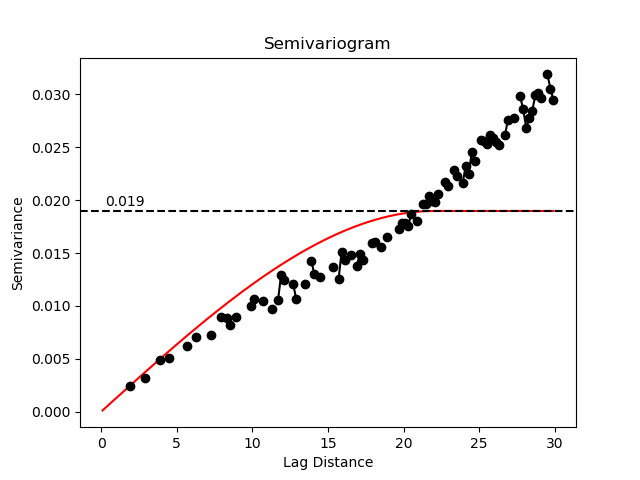

In [247]:
tolerance_u = .25
lags_u = np.arange( tolerance_u, 30, tolerance_u*2 )
sill_u = np.var(P[:,2])
svm_u = model.semivariance( model.spherical, ( 17.5, sill_u ) )
geoplot.semivariogram( P, lags_u, tolerance_u, model=svm_u )
covfct_u = model.covariance( model.spherical, ( 10, sill_u ) )



tolerance_v = .1
lags_v = np.arange( tolerance, 30, tolerance*2 )
sill_v = np.var( Q[:,2] )

svm_v = model.semivariance( model.spherical, ( 22, sill_v ) )
geoplot.semivariogram( Q, lags_v, tolerance_v, model=svm_v )
covfct_v = model.covariance( model.spherical, ( 10, sill_v ) )

In [224]:
pts = np.array((xx.flatten()[ix_nan],yy.flatten()[ix_nan])).T

In [263]:
p

array([36, 38])

<IPython.core.display.Javascript object>


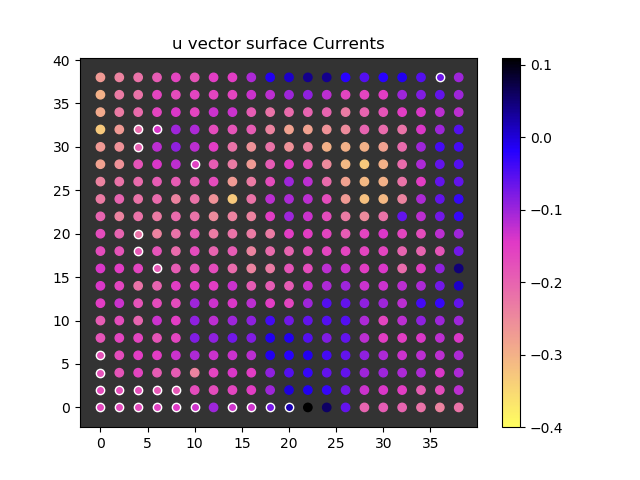

In [262]:
fig,ax = plt.subplots()
ax.set_facecolor('.2')

cax = ax.scatter( P[:,0], P[:,1], c=P[:,2], cmap=geoplot.YPcmap,vmin=-.4,vmax=.11 )
for  p in pts:
    est, kstd = kriging.simple(P, covfct_u, p, N=6 )
    ax.scatter(p[0], p[1], c=est , cmap=geoplot.YPcmap,edgecolors='w' ,vmin=-.4,vmax=.11 )

plt.title('u vector surface Currents')
plt.colorbar(cax)

<IPython.core.display.Javascript object>


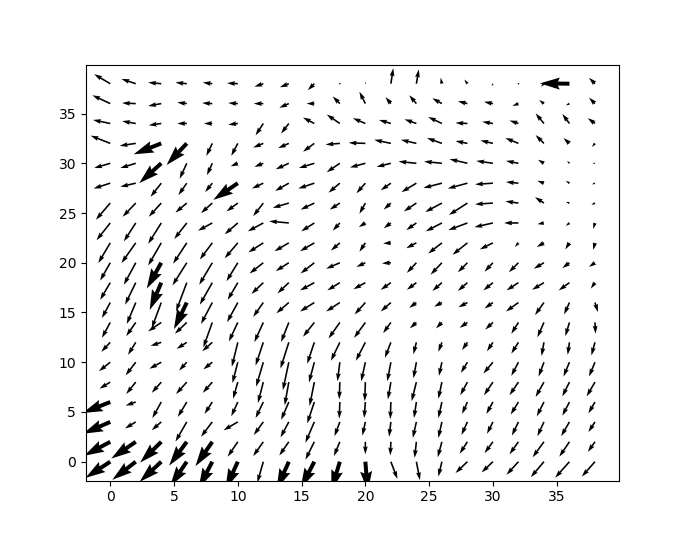

In [297]:
fig,ax = plt.subplots()
# ax.set_facecolor('.2')

qver = ax.quiver(xx,yy,subset['u'],subset['v'],zorder=20)
ix_nan = np.where(np.isnan(subset['u'].values))
for pi,pj in zip(ix_nan[0],ix_nan[1]):
    fill = np.array([xx[pi,pj], yy[pi,pj]])
    est_u, kstd = kriging.simple(P, covfct_u, fill, N=6 )
    est_v, kstd = kriging.simple(Q, covfct_v, fill, N=6 )
    ax.quiver(xx[pi,pj],yy[pi,pj], est_u, est_v,scale = qver.scale)
# plt.title('v vector surface Currents')
# plt.colorbar(cax)

In [296]:
qver.get_linewidth()

array([0])